In [1]:
#https://github.com/pomber/covid19
import numpy as np
import pandas as pd
import json, requests

import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')

today = str(df.date.max().date())
tomorrow = str(df.date.max().date() + datetime.timedelta(days=1))
yesterday = str(df.date.max().date() - datetime.timedelta(days=1))

df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recoveries_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million,perc_death,perc_recovery,active_cases
8158,Yemen,2020-04-12,1,0,0,3,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8159,Yemen,2020-04-13,1,0,0,4,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8160,Yemen,2020-04-14,1,0,0,5,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8161,Yemen,2020-04-15,1,0,0,6,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8162,Yemen,2020-04-16,1,0,0,7,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
countries = df['country'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

----------------------------
### World - Analysis and monitoring

#### Top 5 deadliest countries + Brazil

In [4]:
cols = ['country','day','date','cases','case_day','deaths','death_day', 'cases_million',  'deaths_million', 'avg7_cases_million', 'avg7_deaths_million', 'avg7_recoveries_million']
df_top_deaths = df[df['date']==today].sort_values('avg7_deaths_million', ascending = False)

df_top_deaths.reset_index(0, inplace=True)
df_top_deaths.index = df_top_deaths.index + 1
df_top_deaths = df_top_deaths[cols].head(5).append(df_top_deaths[df_top_deaths['country']=='Brazil'][cols])
df_top_deaths

,country,day,date,cases,case_day,deaths,death_day,cases_million,deaths_million,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million
1,Belgium,73,2020-04-16,34809,1236,4857,417,107.1,36.1,121.0,28.0,29.0
2,San Marino,50,2020-04-16,426,54,38,2,1594.6,59.1,392.0,16.0,25.0
3,Andorra,46,2020-04-16,673,0,33,0,0.0,0.0,166.0,14.0,205.0
4,France,84,2020-04-16,147091,12509,17941,753,192.1,11.6,131.0,12.0,21.0
5,United Kingdom,77,2020-04-16,104145,4662,13759,865,69.0,12.8,80.0,12.0,0.0
140,Brazil,51,2020-04-16,30425,2105,1924,188,10.0,0.9,8.0,0.0,9.0


#### Top 5 most transmissible countries + Brazil

In [5]:
df_top_cases = df[df['date']==today].sort_values('avg7_cases_million', ascending = False)

df_top_cases.reset_index(0, inplace=True)
df_top_cases.index = df_top_cases.index + 1
df_top_cases = df_top_cases[cols].head(5).append(df_top_cases[df_top_cases['country']=='Brazil'][cols])
df_top_cases

,country,day,date,cases,case_day,deaths,death_day,cases_million,deaths_million,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million
1,San Marino,50,2020-04-16,426,54,38,2,1594.6,59.1,392.0,16.0,25.0
2,Ireland,48,2020-04-16,13271,724,486,42,148.3,8.6,195.0,6.0,1.0
3,Andorra,46,2020-04-16,673,0,33,0,0.0,0.0,166.0,14.0,205.0
4,France,84,2020-04-16,147091,12509,17941,753,192.1,11.6,131.0,12.0,21.0
5,Belgium,73,2020-04-16,34809,1236,4857,417,107.1,36.1,121.0,28.0,29.0
52,Brazil,51,2020-04-16,30425,2105,1924,188,10.0,0.9,8.0,0.0,9.0


#### Countries to be analised

In [6]:
#inform the countries you want to analise
monitoredCountries = ['Brazil','Italy', 'United Kingdom', 'Spain', 'US', 'France', 'Belgium',]

#### Cases and deaths 

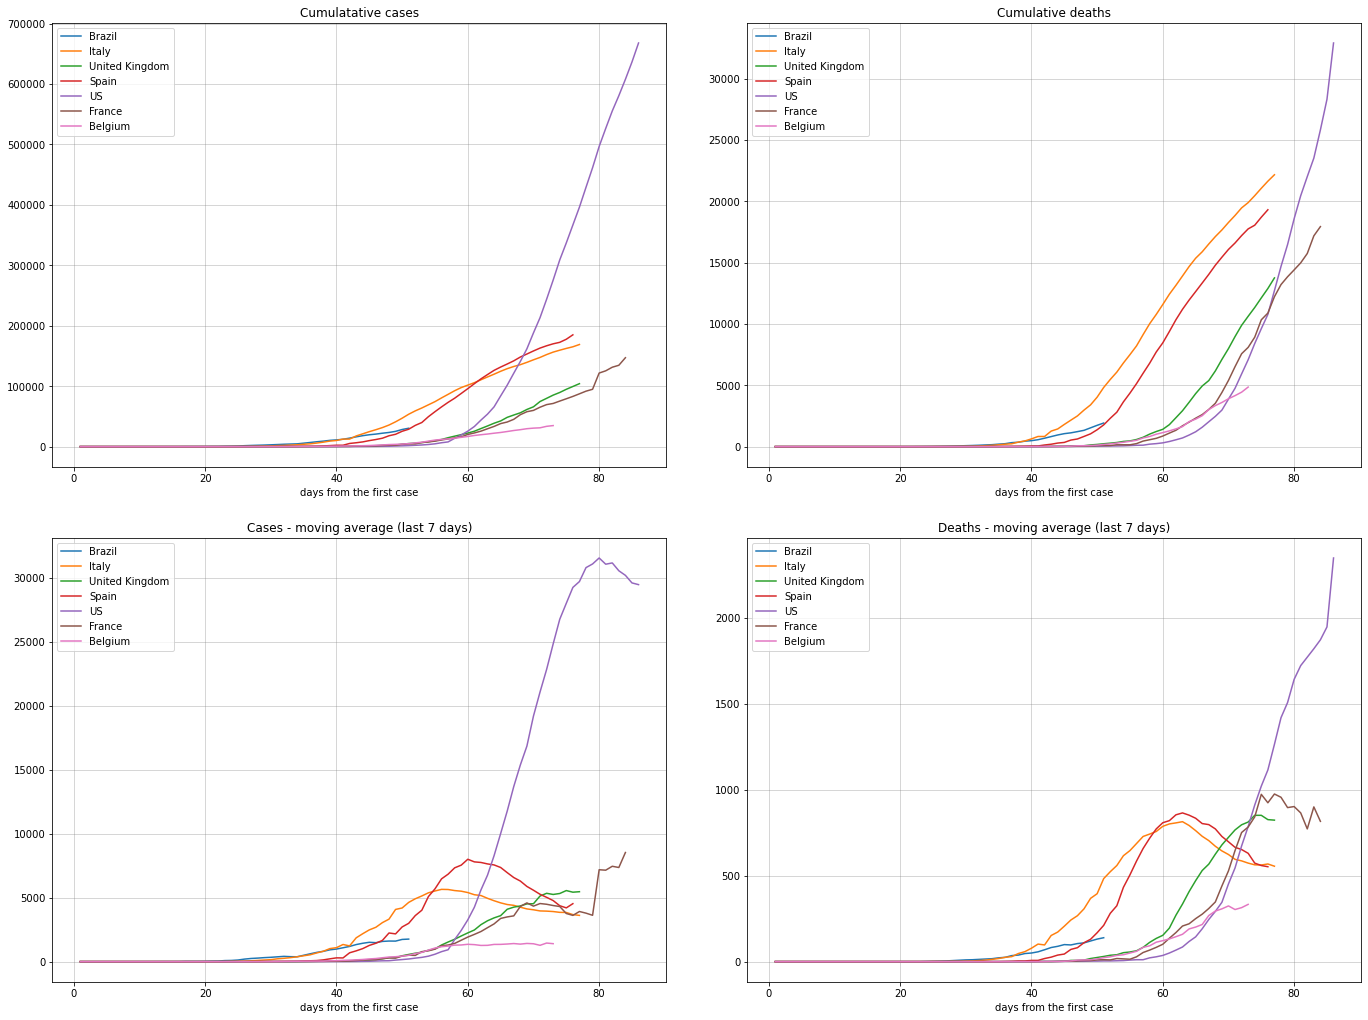

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cumulative deaths")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Cases - moving average (last 7 days)")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Deaths - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].cases, label = country)
    ax2.plot(df[df['country'] == country].day, df[df['country'] == country].deaths, label = country)
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_cases, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_deaths, label = country)
#     ax1.plot(df[df['country'] == country].day, df[df['country'] == country].cases, label = country)
#     ax2.plot(df[df['country'] == country].day, df[df['country'] == country].deaths, label = country)
#     ax3.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_cases, label = country)
#     ax4.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_deaths, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.savefig('../analysis/world_cases_deaths.png')

#### Cases and deaths per million 
(million of population - normalizes per country population)

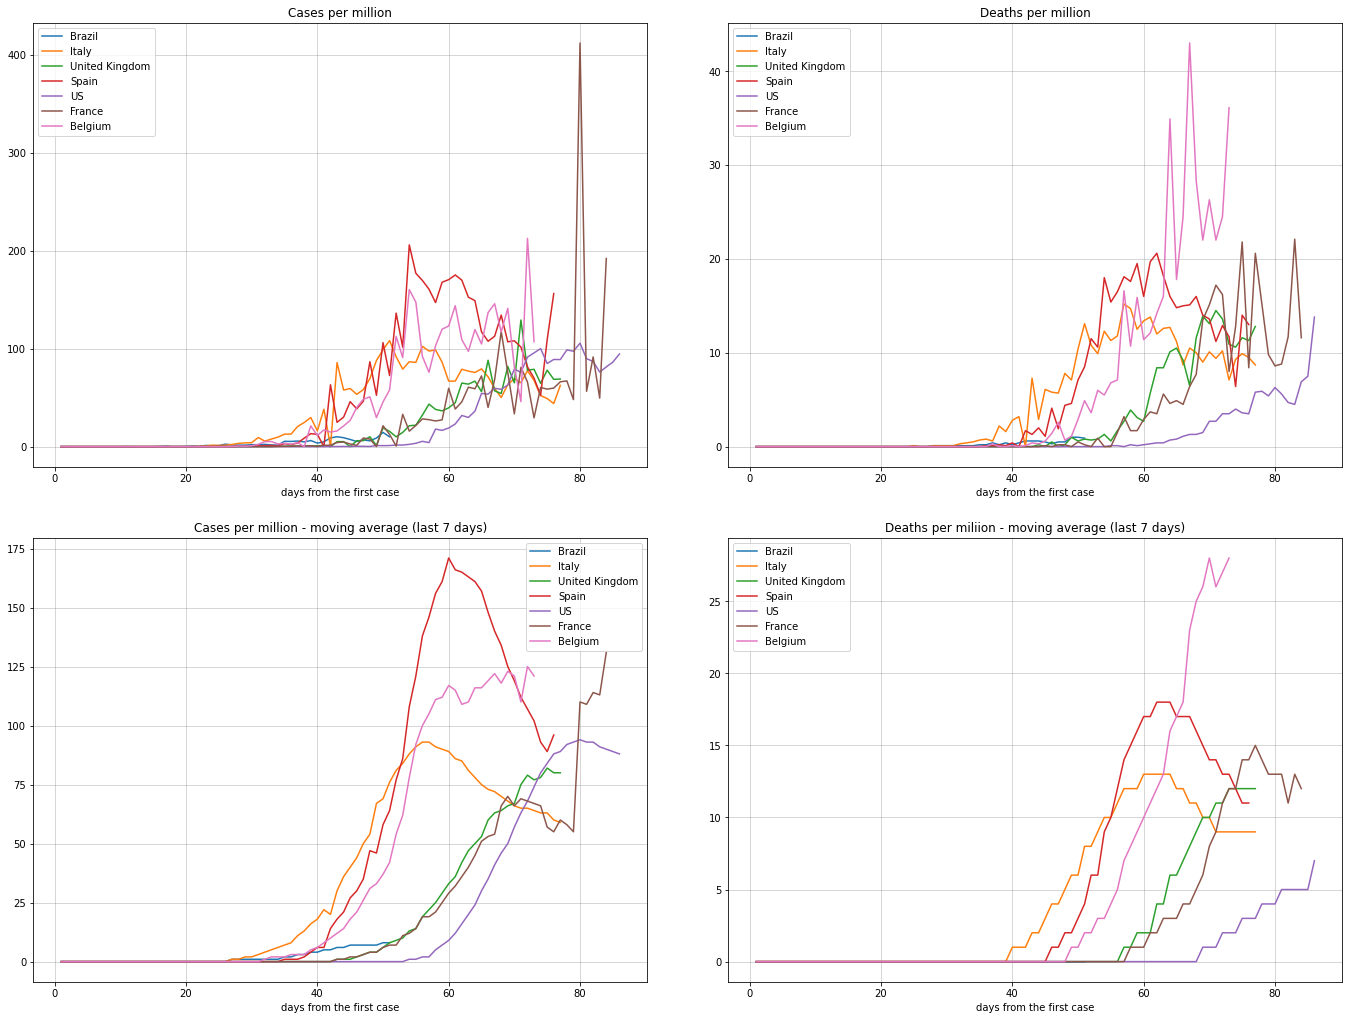

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cases per million")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Deaths per million")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Cases per million - moving average (last 7 days)")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Deaths per miliion - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].cases_million, label = country)
    ax2.plot(df[df['country'] == country].day, df[df['country'] == country].deaths_million, label = country)
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_cases_million, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_deaths_million, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.savefig('../analysis/world_cases_deaths_million.png')

#### Active cases, world overview, % recoveries and lethality

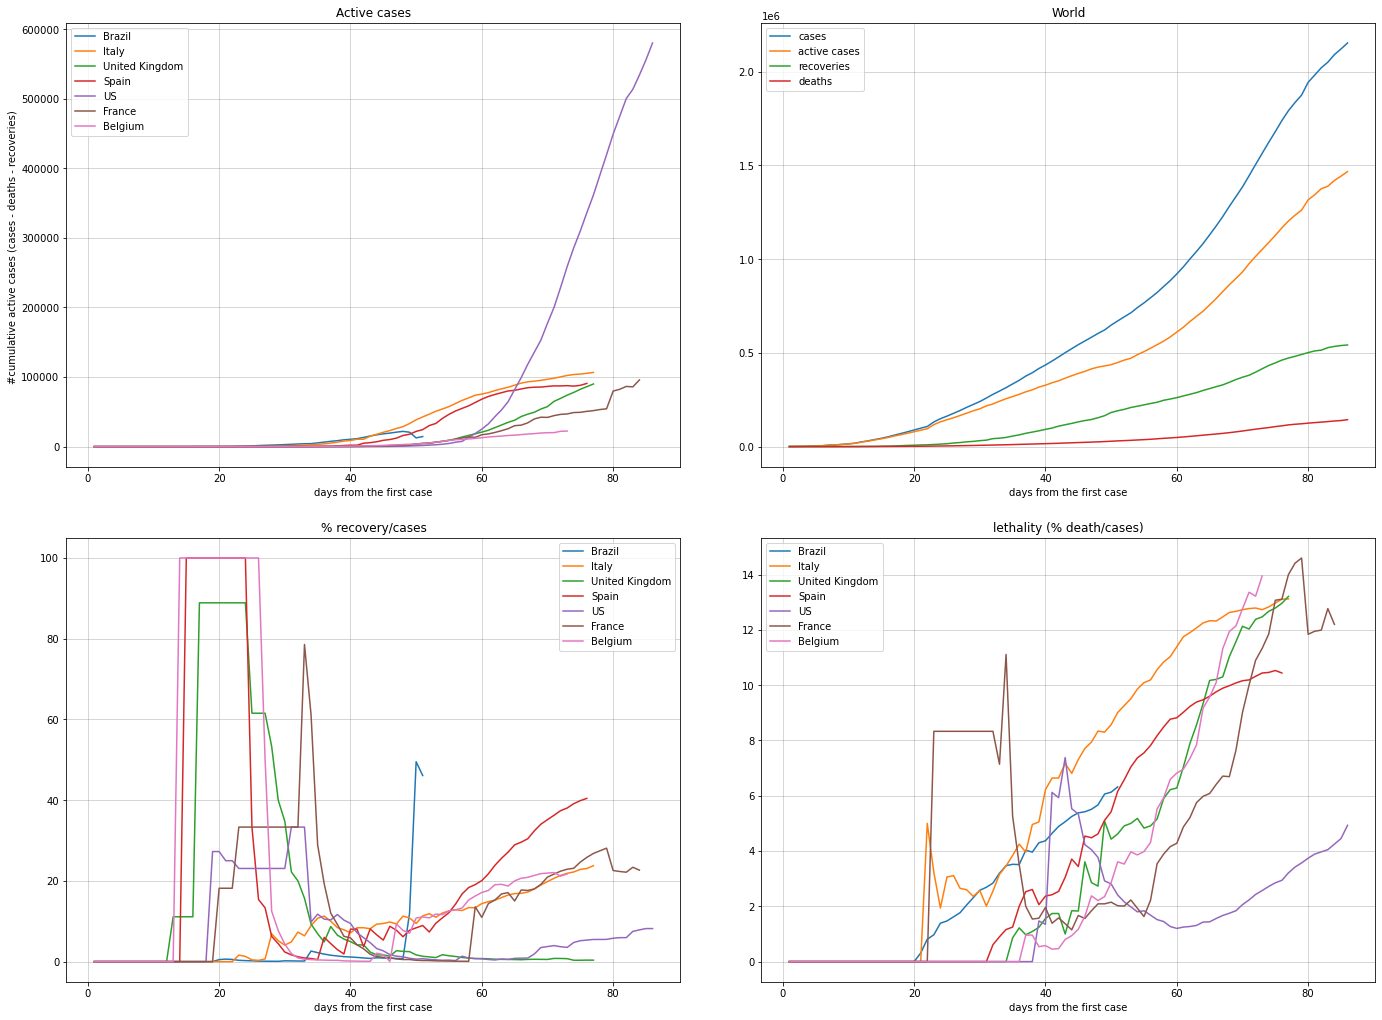

In [9]:
fig, ((ax1, ax2), (ax3, ax4),) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax3.set_title("% recovery/cases")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("lethality (% death/cases)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax1.set_title("Active cases")
ax1.set_xlabel("days from the first case")
ax1.set_ylabel("#cumulative active cases (cases - deaths - recoveries) ")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("World")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].perc_recovery, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].perc_death, label = country)
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].active_cases, label = country)

days = np.arange(1, len(df.groupby('day')['cases'].count())+1,1)
cases_world = df.groupby('day')['case_day'].sum().to_numpy().cumsum()
deaths_world = df.groupby('day')['death_day'].sum().to_numpy().cumsum()
recuperacoes_world = df.groupby('day')['recovery_day'].sum().to_numpy().cumsum()
cases_ativos_world = cases_world - deaths_world - recuperacoes_world

ax2.plot(days, cases_world, label = 'cases')
ax2.plot(days, cases_ativos_world, label = 'active cases')
ax2.plot(days, recuperacoes_world, label = 'recoveries')
ax2.plot(days, deaths_world, label = 'deaths')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.savefig('../analysis/world_active_cases_percentages.png')

---------------------
### Brazil
#### Cases, deaths, recoveries

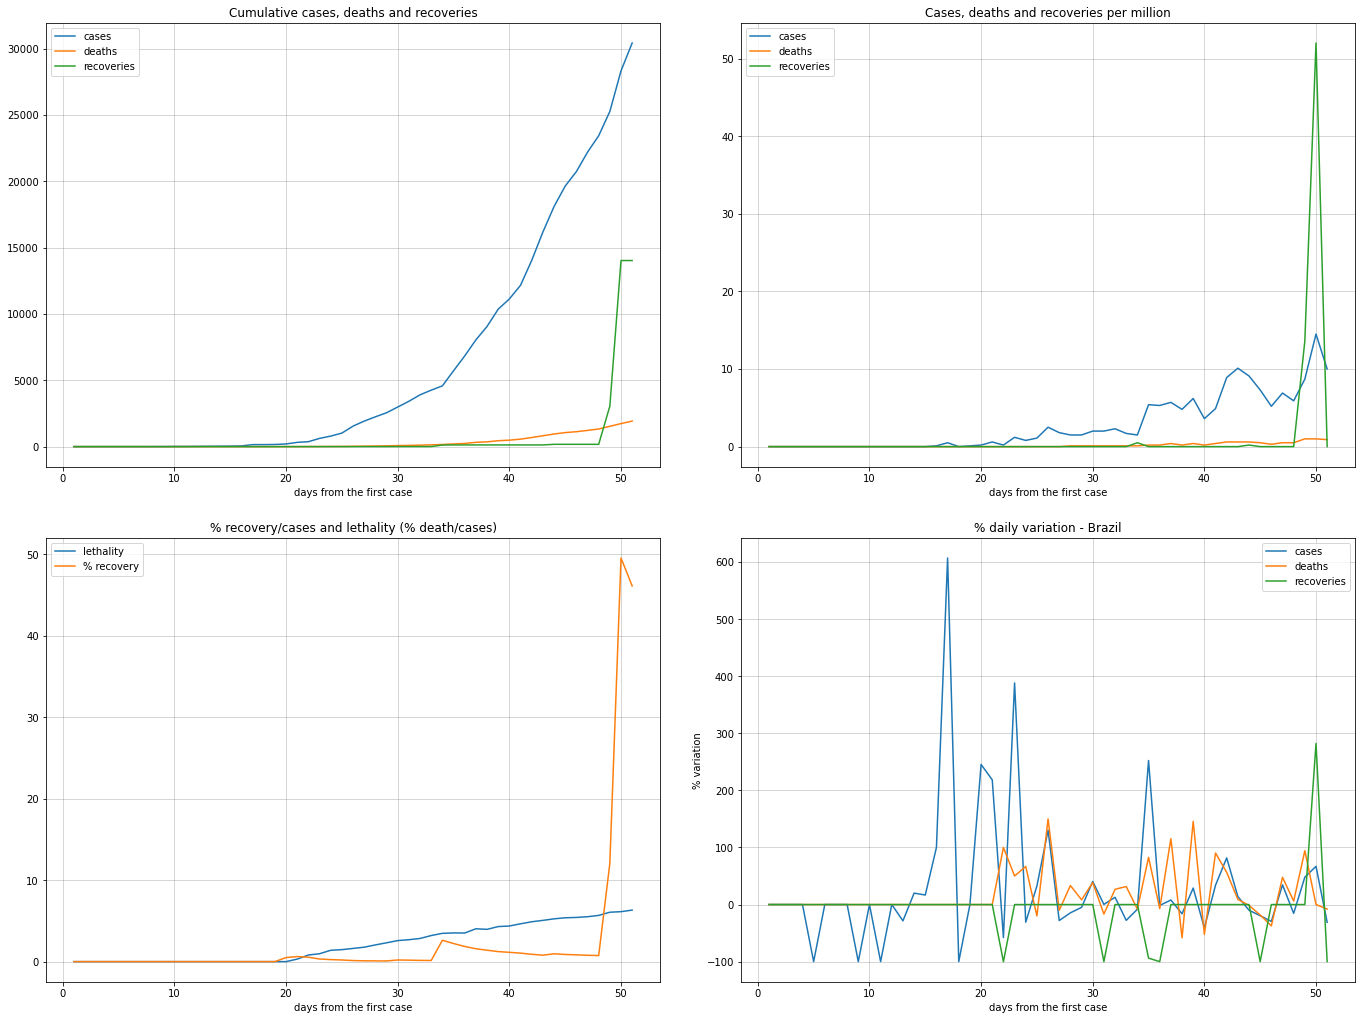

In [10]:
df_br = df[df['country'] == 'Brazil']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulative cases, deaths and recoveries")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)
ax1.plot(df_br.day, df_br.cases, label = 'cases')
ax1.plot(df_br.day, df_br.deaths, label = 'deaths')
ax1.plot(df_br.day, df_br.recoveries, label = 'recoveries')

ax2.set_title("Cases, deaths and recoveries per million")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)
ax2.plot(df_br.day, df_br.cases_million, label = 'cases')
ax2.plot(df_br.day, df_br.deaths_million, label = 'deaths')
ax2.plot(df_br.day, df_br.recoveries_million, label = 'recoveries')


ax3.set_title("% recovery/cases and lethality (% death/cases)")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.perc_death, label = 'lethality')
ax3.plot(df_br.day, df_br.perc_recovery, label = '% recovery')

ax4.set_title("% daily variation - Brazil")
ax4.set_xlabel("days from the first case")
ax4.set_ylabel('% variation')
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br['%var_case_day'], label = 'cases')
ax4.plot(df_br.day, df_br['%var_death_day'], label = 'deaths')
ax4.plot(df_br.day, df_br['%var_recovery_day'], label = 'recoveries')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.savefig('../analysis/brazil_number_million_variation.png')

#### Moving averages (last 7 days)

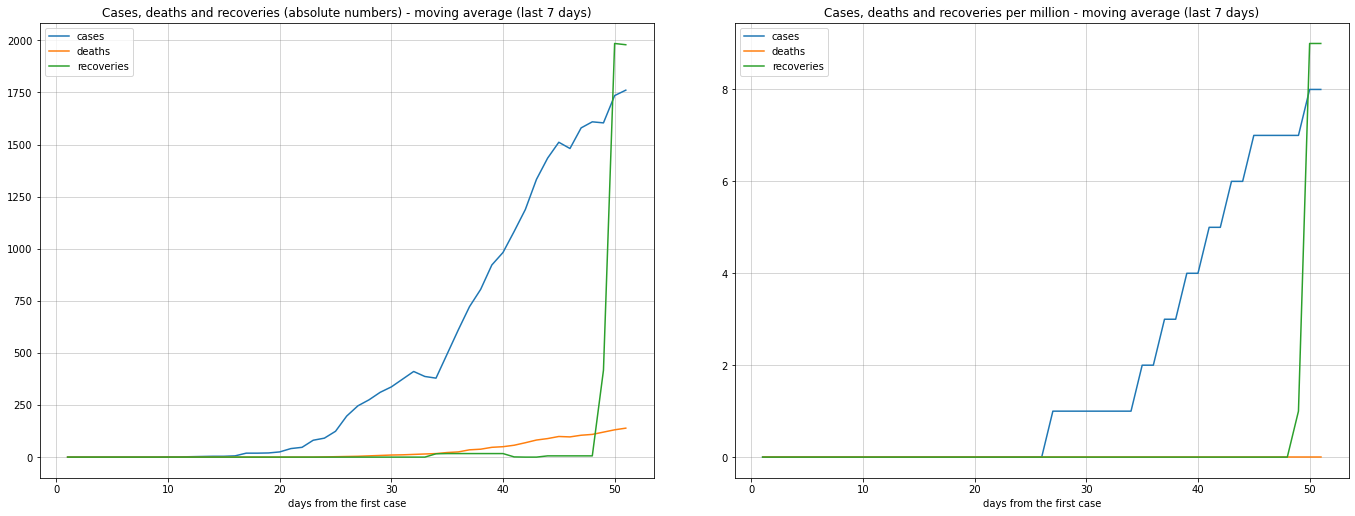

In [11]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cases, deaths and recoveries (absolute numbers) - moving average (last 7 days)")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)
ax1.plot(df_br.day, df_br.avg7_cases, label = 'cases')
ax1.plot(df_br.day, df_br.avg7_deaths, label = 'deaths')
ax1.plot(df_br.day, df_br.avg7_recoveries, label = 'recoveries')

ax2.set_title("Cases, deaths and recoveries per million - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)
ax2.plot(df_br.day, df_br.avg7_cases_million, label = 'cases')
ax2.plot(df_br.day, df_br.avg7_deaths_million, label = 'deaths')
ax2.plot(df_br.day, df_br.avg7_recoveries_million, label = 'recoveries')


# ax4.set_title("# daily quantity - Brazil (absolute numbers)")
# ax4.set_xlabel("days from the first case")
# ax4.set_ylabel('quantity')
# ax4.grid(color='gray', alpha = 0.4)
# ax4.plot(df_br.day, df_br.case_day, label = 'cases')
# ax4.plot(df_br.day, df_br.death_day, label = 'deaths')
# ax4.plot(df_br.day, df_br.recovery_day, label = 'recoveries')

ax1.legend()
ax2.legend()
# ax4.legend()

fig.savefig('../analysis/brazil_movingAvg.png')

### Generating the markdown file

In [12]:
f = open('../analysis/README_WORLD.md', 'w')

readme = '[<img src="https://raw.githubusercontent.com/NovelCOVID/API/master/assets/flags/gb.png" width="40"  /> English version](README_WORLD_EN.md)'
readme += '\n\n #**Análises e monitoramento**\n'
readme += 'Estas análises são relativas aos dados da pandemia Covid19 até a data de **' + today + '**.\n\n'
readme += 'Como existem muitos países, colocar em um gráfico todos seus dados tornaria a leitura e compreensão inviáveis, selecionei os seguintes países mais o Brasil para serem comparados entre si:'
readme += str(monitoredCountries) + '.\n\n'
readme += 'Alguns países não estão no *dataset* da ONU, então não conseguimos analisá-los por sua populações. Estes podem ser encontrados fim do notebook *[data_engineering.ipynb](../data_engineering.ipynb)*.\n'
readme += '\n***Dica**: você pode alterar você mesmo neste notebook quais países você prefere comparar.*\n\n'
readme += '## Top 5 países mais letais + Brasil\n'
readme += df_top_deaths.to_markdown()
# readme += tabulate(df_top_deaths.values,df_top_deaths.columns, tablefmt="pipe")
readme += '\n\n\n ## Top 5 países mais transmissíveis + Brasil\n'
readme += df_top_cases.to_markdown()
#tabulate(df_top_cases.values,df_top_cases.columns, tablefmt="pipe")

readme += '\n----------------------\n'
readme += '## Análises mundiais\n'
readme += '### Casos e mortes\n'
readme += '![](world_cases_deaths.png)'

readme += '\n\n ### Casos e mortes por milhão\n'
readme += 'Milhão de população noramilza os números de modo que a comparação entre países fica mais adequada. Como podemos ver, os primeiros gráficos nos mostram quão agressivo é a pandemia na Itália e Espanha.\n'
readme += '![](world_cases_deaths_million.png)'

readme += '\n\n ### Casos ativos, uma visão mundial, % de recuperações e letalidade\n'
readme += '![](world_active_cases_percentages.png)'

readme += '\n----------------------\n'
readme += '## Análises do Brasil\n'
readme += '\n\n ### Casos, mortes e recuperações\n'
readme += '![](brazil_number_million_variation.png)'

readme += '\n\n ### Médias móveis dos últimos 7 dias\n'
readme += '![](brazil_movingAvg.png)'

f.write(readme)
f.close()

###########################################

f = open('../analysis/README_WORLD_EN.md', 'w')
readme = '[<img src="https://raw.githubusercontent.com/NovelCOVID/API/master/assets/flags/br.png" width="40"  /> Versão em português](README_WORLD.md)'

readme += '\n\n #**Analysis and monitoring**\n'
readme += 'These analysis are related to the Covid19 pandemic data up to **' + today + '**.\n\n'
readme += 'As there are many countries to have all of their data plotted together, I selected a few of them plus Brazil to be compared with:'
readme += str(monitoredCountries) + '.\n\n'
readme += 'Some countries are not in UN dataset, so we can not analyse them by population. They can be found at the end of the *[data_engineering.ipynb](../data_engineering.ipynb)*.\n'
readme += '\n*Tip: you can set yourself at the analysis notebook which countries you prefer to compare*\n\n'
readme += '## Top 5 deadliest countries + Brazil\n'
readme += df_top_deaths.to_markdown()
# readme += tabulate(df_top_deaths.values,df_top_deaths.columns, tablefmt="pipe")
readme += '\n\n\n ## Top 5 most transmissible countries + Brazil\n'
readme += df_top_cases.to_markdown()
#tabulate(df_top_cases.values,df_top_cases.columns, tablefmt="pipe")

readme += '\n----------------------\n'
readme += '## World\' analysis\n'
readme += '### Cases and deaths\n'
readme += '![](world_cases_deaths.png)'

readme += '\n\n ### Cases and deaths per million\n'
readme += 'Million of population normalizes the features so they can me better comparable among the selected countries. As we can see, the first charts shows us how aggressive the pandemic is in Italy, Spain and somehow in France.\n'
readme += '![](world_cases_deaths_million.png)'

readme += '\n\n ### Active cases, world overview, % recoveries and lethality\n'
readme += '![](world_active_cases_percentages.png)'

readme += '\n----------------------\n'
readme += '## Brazil\'s analysis\n'
readme += '\n\n ### Cases, deaths and recoveries\n'
readme += '![](brazil_number_million_variation.png)'

readme += '\n\n ### Moving averages (last 7 days)\n'
readme += '![](brazil_movingAvg.png)'

f.write(readme)
f.close()
print('World analysis done!')

World analysis done!
